## 1. Import data

In [18]:
df = pd.read_csv('/kaggle/input/vietnamese-text-classification-dataset/train.csv', names=['label', 'content'])
df.head()

,label,content
0,0,máy dùng hay bị đơ máy
1,0,chỉ có dây cáp nguồn không có adapter sao sử d...
2,0,Chất lượng quá kém Mới dùng được 2 ngày loa ba...
3,0,Usb tôi vừa mới nhận usb này Rất bực bội vì cá...
4,2,Tuyệt vời. Hàng FPT cửa hàng


In [19]:
print(df['label'].unique())

[0 2 1]


## 2. Preprocessing (clean text)

In [20]:
import re
def preprocessing(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', ' ',text)

    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', text) #Removing emojis
    return text

In [21]:
X = df['content']
y = df['label']
print(f'total_data = {len(X)}')

total_data = 3040


## 3. Training with hold-out method 

### 3.1 Splitting the data set into train and test sets with `test_size = 0.2`

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'------------total train data {len(X_train)}')
print(f'label {0} has { y_train.value_counts()[0] } datapoint')
print(f'label {1} has { y_train.value_counts()[1]} datapoint')
print(f'label {2} has { y_train.value_counts()[2] } datapoint')
print()

print(f'------------total test data {len(X_test)}')
print(f'label {0} has { y_train.value_counts()[0] } datapoint')
print(f'label {1} has { y_train.value_counts()[1] } datapoint')
print(f'label {2} has { y_train.value_counts()[2] } datapoint')

------------total train data 2432
label 0 has 864 datapoint
label 1 has 712 datapoint
label 2 has 856 datapoint

------------total test data 608
label 0 has 864 datapoint
label 1 has 712 datapoint
label 2 has 856 datapoint


### 3.2 Normalization train data using TfidfVectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X_vectors = tfidf_vectorizer.fit(X)

X_train_vectors = tfidf_vectorizer.transform(X_train)
X_test_vectors = tfidf_vectorizer.transform(X_test)



In [24]:
print(tfidf_vectorizer.get_feature_names_out())

['00' '000' '01' ... 'ủng' 'ức' 'ứng']


In [25]:
print(f'tf-idf len vocal : {X_train_vectors.shape[-1]}')
print(f'tf-idf len vocal : {X_test_vectors.shape[-1]}')


tf-idf len vocal : 3204
tf-idf len vocal : 3204


### 3.3 Text Classification using MultinomialNB 

#### Training

In [26]:
from sklearn.naive_bayes import MultinomialNB

# Tạo một mô hình Naive Bayes với các siêu tham số tự chọn
mnb = MultinomialNB() #học xác suất tiền nghiệm từ dữ liệu huấn luyện

# Fit mô hình trên train data
mnb.fit(X_train_vectors, y_train)

# Predict trên test data
y_test_pred = mnb.predict(X_test_vectors)

#### Evaluation

In [27]:
import sklearn.metrics as metrics

accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_test_pred)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred = y_test_pred, average = None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred, average = 'micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred, average = 'macro')
print(f'The test f1_macro is: {f1_macro}')

The test accuracy is: 0.7796052631578947
The test f1_score is: [0.82758621 0.62251656 0.83610451]
The test f1_micro is: 0.7796052631578947
The test f1_macro is: 0.7620690920840252


#### Confusion matrix

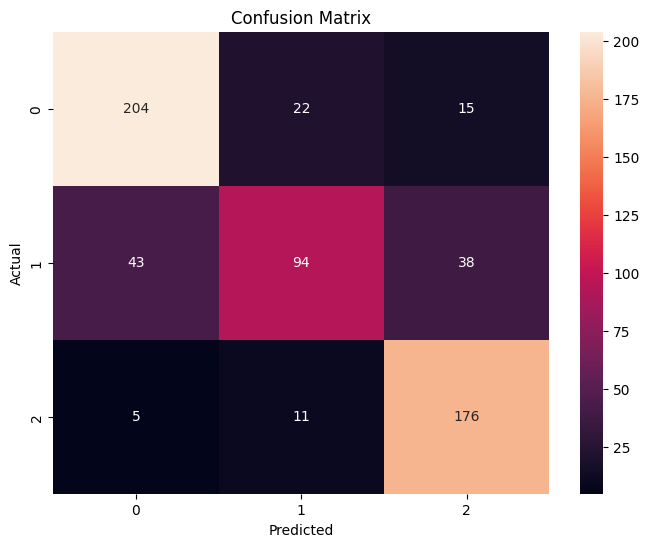

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
cm_test = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 3.4 SVM model

#### Training

In [29]:
from sklearn import svm
#Use Radial Basis Function kernel
rbf = svm.SVC()

# Fit mô hình trên train data
rbf.fit(X_train_vectors, y_train)

# Predict trên test data
y_test_pred_rbf = rbf.predict(X_test_vectors)

#### Evaluation

In [30]:
import sklearn.metrics as metrics

accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_test_pred_rbf)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred = y_test_pred_rbf, average = None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred_rbf, average = 'micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred_rbf, average = 'macro')
print(f'The test f1_macro is: {f1_macro}')

The test accuracy is: 0.8240131578947368
The test f1_score is: [0.85714286 0.71597633 0.87664042]
The test f1_micro is: 0.8240131578947368
The test f1_macro is: 0.8165865361504369


#### Plot confusion_matrix

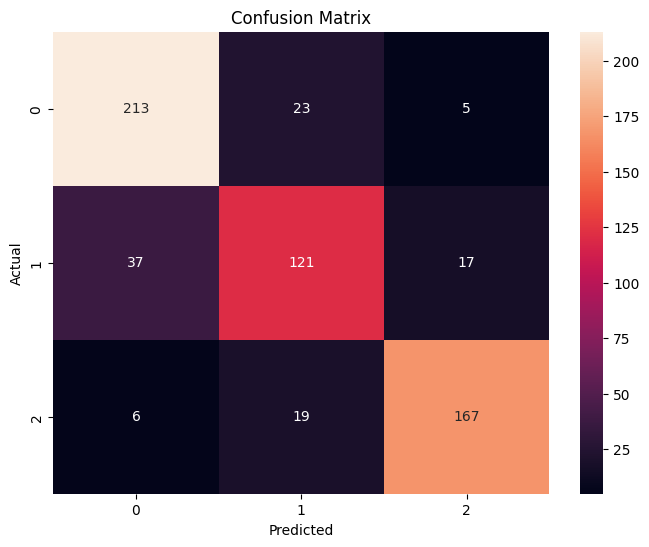

In [31]:
cm_test_rbf = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rbf, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 3.5 Comments and reviews

- Based on the values ​​of the evaluation metrics of each algorithm. We can see that `SVM is better than Naive Bayes in this problem`. 
- This is text_classification, maybe it fits the Naive Bayes. Because in Naive Bayes algorithm, we assume that all features are independent of each other so it fits text problem but in this problem, SVM is better.
- But we haven't used hyperparameter tunning on two algorithm above so if we use hyperparameter tunning, the evaluate results maybe different. 

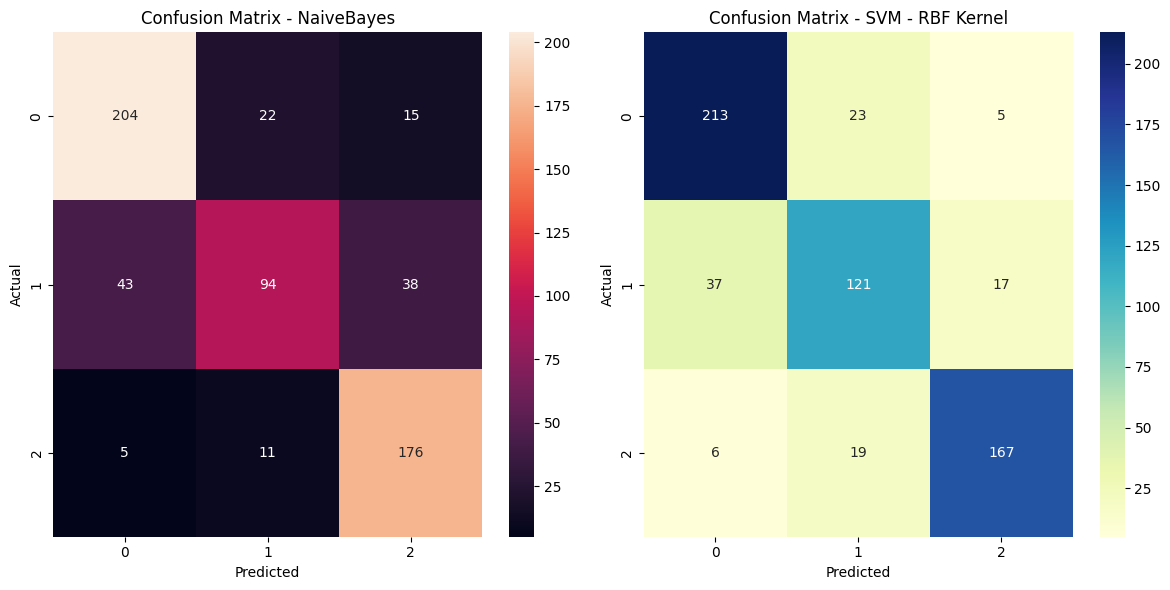

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
cm_test = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred)
cm_test_rbf = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred_rbf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

sns.heatmap(cm_test, ax = ax1, annot=True, fmt="d")
ax1.set_title("Confusion Matrix - NaiveBayes")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")

sns.heatmap(cm_test_rbf, ax = ax2, cmap="YlGnBu", annot=True, fmt="d")  # Customize colormap and interpolation
ax2.set_title("Confusion Matrix - SVM - RBF Kernel")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svm_model = svm.SVC()
grid_search = GridSearchCV(svm_model, param_grid)
grid_search.fit(X_train_vectors, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

print(f"best_params: {best_params} \n best_svm_model = {best_svm_model}")

best_params: {'kernel': 'rbf'} 
 best_svm_model = SVC()
